In [28]:
import tkinter as tk
from tkinter import ttk, messagebox
import time

# ------------------- Các thuật toán -------------------
def naive_search(text, pattern):
    n, m = len(text), len(pattern)
    result = []
    for i in range(n - m + 1):
        if text[i:i + m] == pattern:
            result.append(i)
    return result


In [29]:
def rabin_karp(text, pattern, prime=131071):
    n, m = len(text), len(pattern)
    result = []
    d = 256
    # h = pow(d, m - 1) % prime
    h = pow(d, m - 1, prime)  # sửa ở đây

    p_hash = 0
    t_hash = 0

    for i in range(m):
        p_hash = (d * p_hash + ord(pattern[i])) % prime
        t_hash = (d * t_hash + ord(text[i])) % prime

    for i in range(n - m + 1):
        if p_hash == t_hash:
            if text[i:i + m] == pattern:
                result.append(i)
        if i < n - m:
            t_hash = (d * (t_hash - ord(text[i]) * h) + ord(text[i + m])) % prime
            if t_hash < 0:
                t_hash += prime
    return result


In [30]:
def initd(pat, m, d):
    """Khởi tạo bảng dịch chuyển d theo heuristics occurrence."""
    for k in range(256):  # ASCII
        d[k] = m
    for k in range(m - 1):  # Lưu ý: không xét ký tự cuối cùng
        d[ord(pat[k])] = m - k - 1

def initdd(pat, m, dd):
    """Khởi tạo bảng dịch chuyển dd theo heuristics matching suffix."""
    dd[:] = [0] * (m + 1)
    f = [0] * (m + 1)
    i, j = m, m + 1
    f[i] = j

    while i > 0:
        while j <= m and pat[i - 1] != pat[j - 1]:
            if dd[j] == 0:
                dd[j] = j - i
            j = f[j]
        i -= 1
        j -= 1
        f[i] = j

    j = f[0]
    for i in range(m + 1):
        if dd[i] == 0:
            dd[i] = j
        if i == j:
            j = f[j]

def boyer_moore(text, pat):
    """Tìm tất cả vị trí xuất hiện của pat trong text."""
    n = len(text)
    m = len(pat)
    if m == 0:
        return []

    d = [0] * 256
    dd = [0] * (m + 1)
    initd(pat, m, d)
    initdd(pat, m, dd)

    matches = []
    k = m - 1

    while k < n:
        j = m - 1
        i = k
        while j >= 0 and text[i] == pat[j]:
            j -= 1
            i -= 1
        if j < 0:
            matches.append(i + 1)
            k += dd[0] if dd[0] > 0 else 1
        else:
            char_shift = d[ord(text[k])] if ord(text[k]) < 256 else m
            suffix_shift = dd[j + 1]
            k += max(char_shift, suffix_shift)

    return matches


In [31]:
# ------------------- GUI Tkinter -------------------
def run_search():
    text = text_entry.get("1.0", tk.END).strip()
    pattern = pattern_entry.get().strip()
    algorithm = algo_choice.get()

    if not text or not pattern:
        messagebox.showwarning("Lỗi", "Vui lòng nhập cả chuỗi văn bản và pattern!")
        return

    start = time.time()
    if algorithm == "Naive":
        result = naive_search(text, pattern)
    elif algorithm == "Rabin-Karp":
        result = rabin_karp(text, pattern)
    elif algorithm == "Boyer-Moore":
        result = boyer_moore(text, pattern)
    else:
        result = []
    end = time.time()

    output_text.set(f"Vị trí khớp: {result}\nThời gian: {(end - start)*1000000:.6f} mrs")

# Khởi tạo GUI
root = tk.Tk()
root.title("Khớp Xâu - Naive / Karp / Boyer-Moore")
root.geometry("600x400")

tk.Label(root, text="Nhập văn bản:").pack()
text_entry = tk.Text(root, height=6)
text_entry.pack()

tk.Label(root, text="Nhập pattern:").pack()
pattern_entry = tk.Entry(root)
pattern_entry.pack()

tk.Label(root, text="Chọn thuật toán:").pack()
algo_choice = ttk.Combobox(root, values=["Naive", "Rabin-Karp", "Boyer-Moore"])
algo_choice.current(0)
algo_choice.pack()

tk.Button(root, text="Tìm kiếm", command=run_search).pack(pady=10)

output_text = tk.StringVar()
tk.Label(root, textvariable=output_text, wraplength=580, justify="left", fg="blue").pack()

root.mainloop()

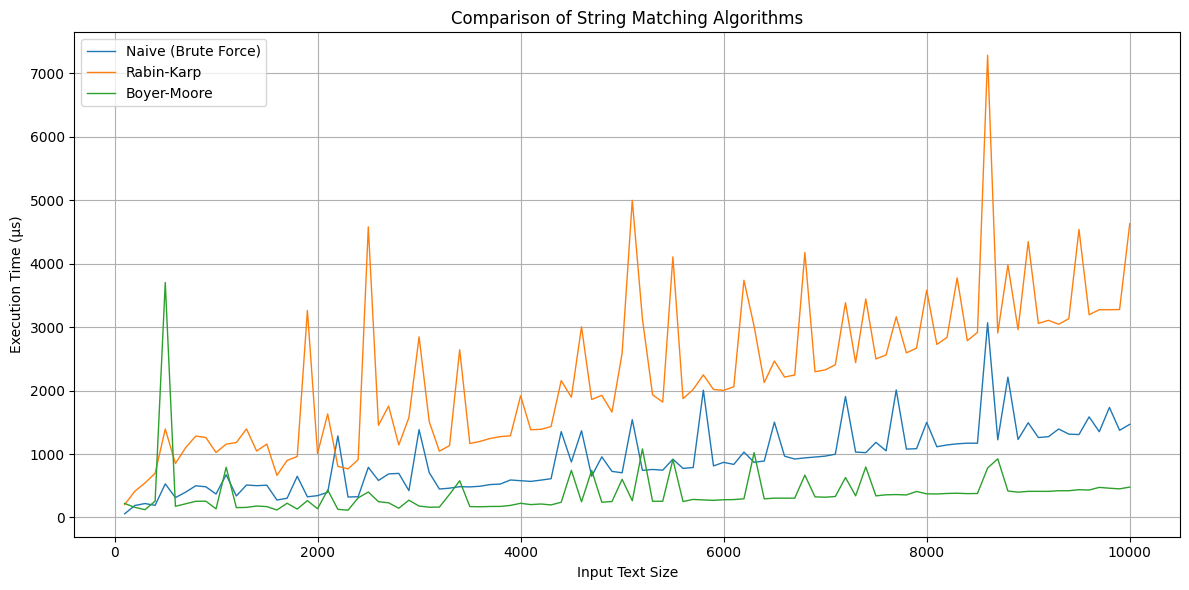

In [32]:
import time
import random
import string
import matplotlib.pyplot as plt

# Run tests
input_sizes = list(range(100, 10001, 100))  # 100 data points
naive_times, rk_times, bm_times = [], [], []

for size in input_sizes:
    # Tạo text ngẫu nhiên gồm chữ cái (a-z, A-Z)
    text = ''.join(random.choices(string.ascii_letters, k=size))
    
    # Chọn ngẫu nhiên vị trí bắt đầu trong text để lấy pattern
    start_index = random.randint(0, size - 10)
    pattern = text[start_index: start_index + 10]
    
    start = time.perf_counter()
    naive_search(text, pattern)
    naive_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    rabin_karp(text, pattern)
    rk_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    boyer_moore(text, pattern)
    bm_times.append((time.perf_counter() - start) * 1_000_000)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, naive_times, label='Naive (Brute Force)', linewidth=1)
plt.plot(input_sizes, rk_times, label='Rabin-Karp', linewidth=1)
plt.plot(input_sizes, bm_times, label='Boyer-Moore', linewidth=1)
plt.xlabel('Input Text Size')
plt.ylabel('Execution Time (μs)')
plt.title('Comparison of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Trường hợp đặc biệt Hai sâu bằng nhau

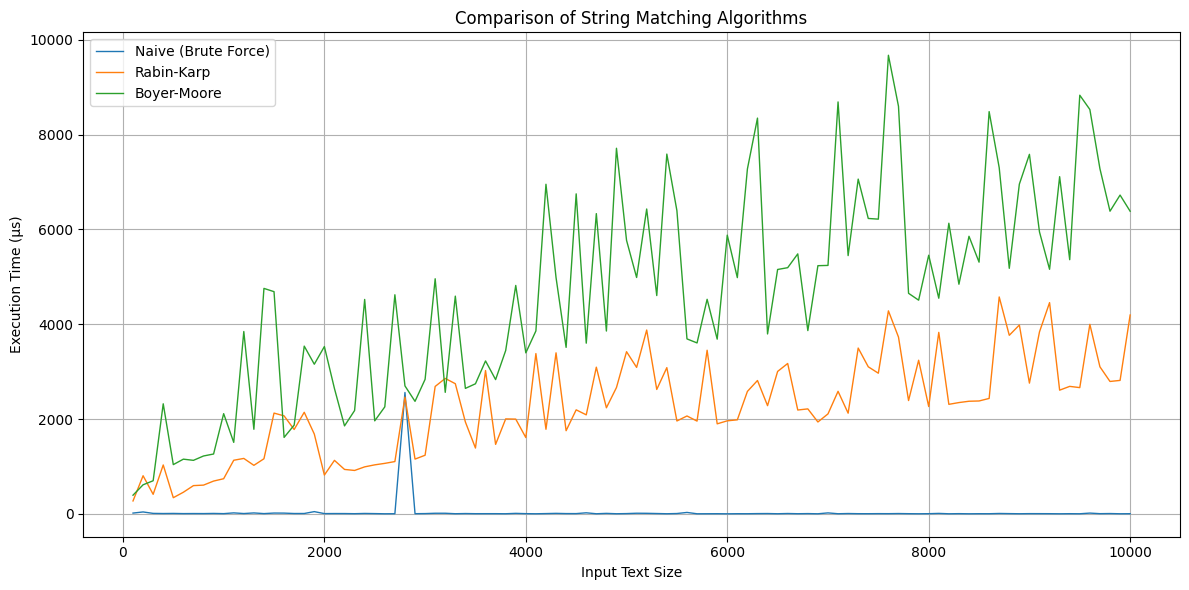

In [38]:
# Trường hợp đặc biệt Hai sâu bằng nhau
import time
import random
import string
import matplotlib.pyplot as plt

# Run tests
input_sizes = list(range(100, 10001, 100))  # 100 data points
naive_times, rk_times, bm_times = [], [], []

for size in input_sizes:
    charset = string.ascii_letters + string.digits + string.punctuation + ' '
    text = ''.join(random.choices(charset, k=size))
    # pattern = text[size//2: size//2 + 10]
    pattern = text
    start = time.perf_counter()
    naive_search(text, pattern)
    naive_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    rabin_karp(text, pattern)
    rk_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    boyer_moore(text, pattern)
    bm_times.append((time.perf_counter() - start) * 1_000_000)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, naive_times, label='Naive (Brute Force)', linewidth=1)
plt.plot(input_sizes, rk_times, label='Rabin-Karp', linewidth=1)
plt.plot(input_sizes, bm_times, label='Boyer-Moore', linewidth=1)
plt.xlabel('Input Text Size')
plt.ylabel('Execution Time (μs)')
plt.title('Comparison of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Trường hợp đặc biệt Không khớp

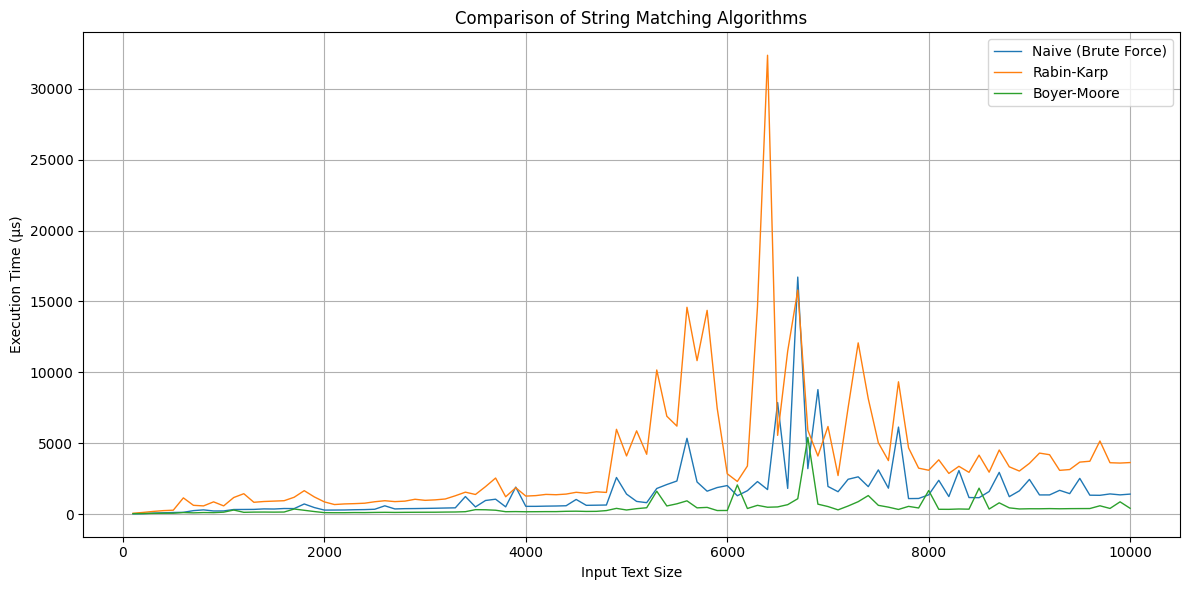

In [34]:
# Trường hợp đặc biệt Không khớp
import time
import random
import string
import matplotlib.pyplot as plt

# Run tests
input_sizes = list(range(100, 10001, 100))  # 100 data points
naive_times, rk_times, bm_times = [], [], []

for size in input_sizes:
    # Tạo văn bản ngẫu nhiên chỉ chứa chữ cái (a-z, A-Z)
    text = ''.join(random.choices(string.ascii_letters, k=size))
    # Tạo mẫu ngẫu nhiên chỉ chứa chữ số (0-9)
    pattern = ''.join(random.choices(string.digits, k=10))
    start = time.perf_counter()
    naive_search(text, pattern)
    naive_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    rabin_karp(text, pattern)
    rk_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    boyer_moore(text, pattern)
    bm_times.append((time.perf_counter() - start) * 1_000_000)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, naive_times, label='Naive (Brute Force)', linewidth=1)
plt.plot(input_sizes, rk_times, label='Rabin-Karp', linewidth=1)
plt.plot(input_sizes, bm_times, label='Boyer-Moore', linewidth=1)
plt.xlabel('Input Text Size')
plt.ylabel('Execution Time (μs)')
plt.title('Comparison of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Khi khớp ngay đầy chuỗi

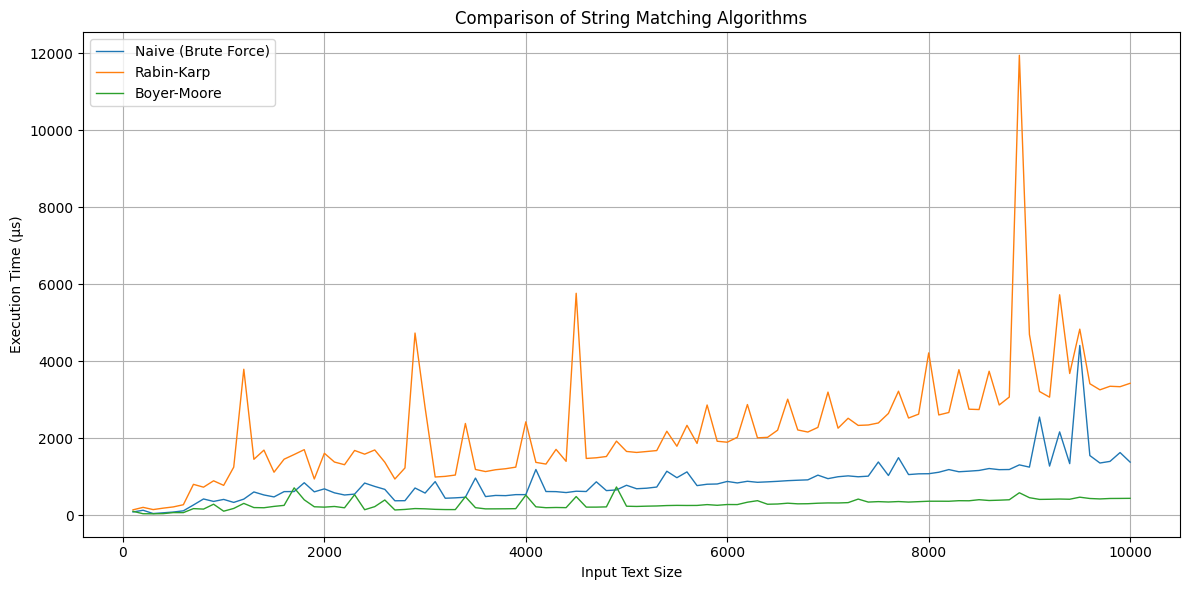

In [35]:
import time
import random
import string
import matplotlib.pyplot as plt

# Run tests
input_sizes = list(range(100, 10001, 100))  # 100 data points
naive_times, rk_times, bm_times = [], [], []

for size in input_sizes:
    # Tạo text ngẫu nhiên gồm chữ cái (a-z, A-Z)
    text = ''.join(random.choices(string.ascii_letters, k=size))
    
    pattern = text[0: 10]
    
    start = time.perf_counter()
    naive_search(text, pattern)
    naive_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    rabin_karp(text, pattern)
    rk_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    boyer_moore(text, pattern)
    bm_times.append((time.perf_counter() - start) * 1_000_000)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, naive_times, label='Naive (Brute Force)', linewidth=1)
plt.plot(input_sizes, rk_times, label='Rabin-Karp', linewidth=1)
plt.plot(input_sizes, bm_times, label='Boyer-Moore', linewidth=1)
plt.xlabel('Input Text Size')
plt.ylabel('Execution Time (μs)')
plt.title('Comparison of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Khi khớp ở cuối chuỗi

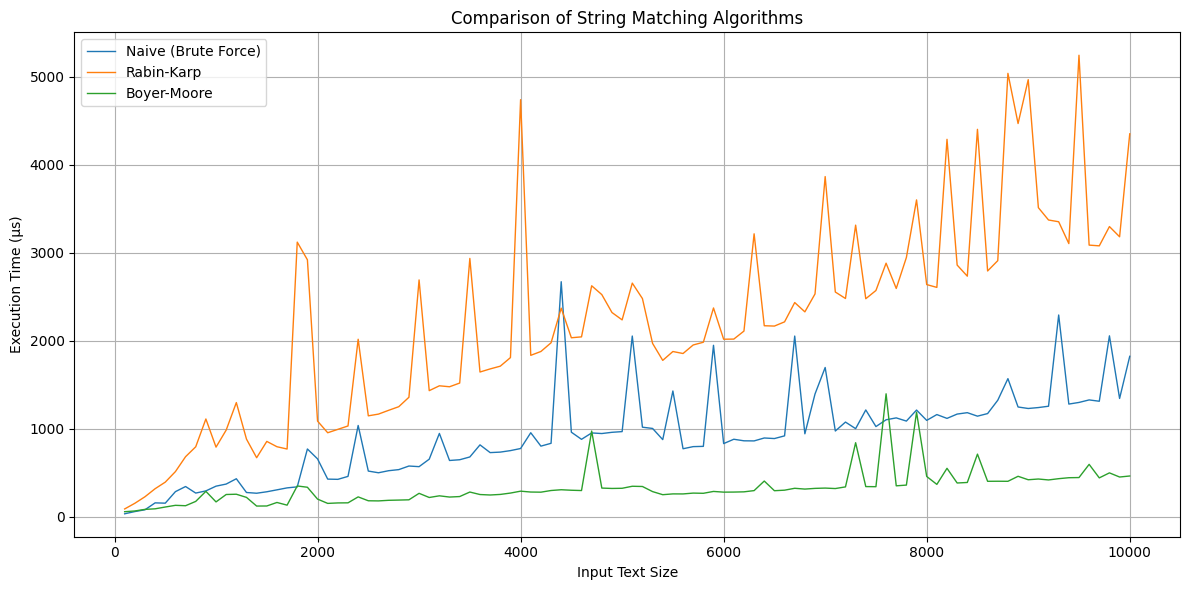

In [36]:
import time
import random
import string
import matplotlib.pyplot as plt

# Run tests
input_sizes = list(range(100, 10001, 100))  # 100 data points
naive_times, rk_times, bm_times = [], [], []

for size in input_sizes:
    # Tạo text ngẫu nhiên gồm chữ cái (a-z, A-Z)
    text = ''.join(random.choices(string.ascii_letters, k=size))
    
    start_index = size - 10
    pattern = text[start_index: start_index + 10]
    
    start = time.perf_counter()
    naive_search(text, pattern)
    naive_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    rabin_karp(text, pattern)
    rk_times.append((time.perf_counter() - start) * 1_000_000)
    start = time.perf_counter()
    boyer_moore(text, pattern)
    bm_times.append((time.perf_counter() - start) * 1_000_000)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(input_sizes, naive_times, label='Naive (Brute Force)', linewidth=1)
plt.plot(input_sizes, rk_times, label='Rabin-Karp', linewidth=1)
plt.plot(input_sizes, bm_times, label='Boyer-Moore', linewidth=1)
plt.xlabel('Input Text Size')
plt.ylabel('Execution Time (μs)')
plt.title('Comparison of String Matching Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()